In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import & Exploring Data

In [75]:
df = pd.read_csv('../input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
# View Summary Table
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [78]:
# Check Missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. Data Analysis

### Sex Analysis

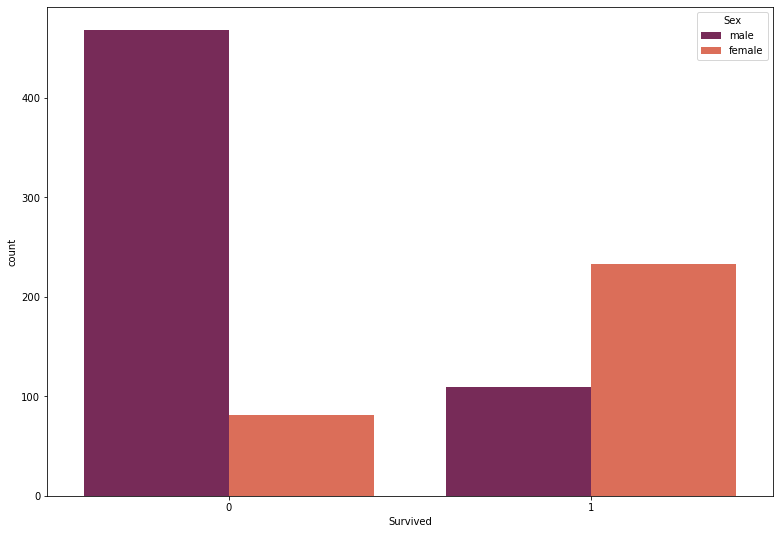

In [61]:
fig = plt.gcf()
fig.set_size_inches(13, 9)
sns.countplot(x="Survived", hue="Sex", data=df, palette="rocket")

### Passenger Class Analysis

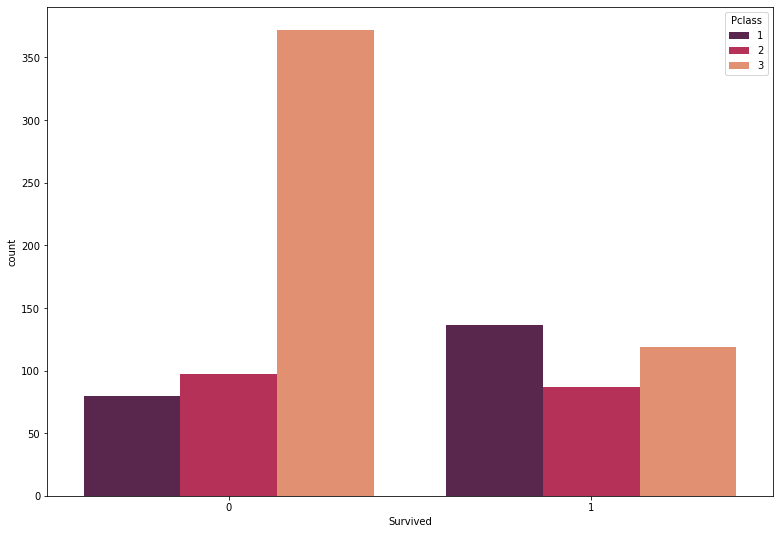

In [7]:
fig = plt.gcf()
fig.set_size_inches(13, 9)
sns.countplot(x="Survived", hue="Pclass", data=df, palette="rocket")

### Age Analysis

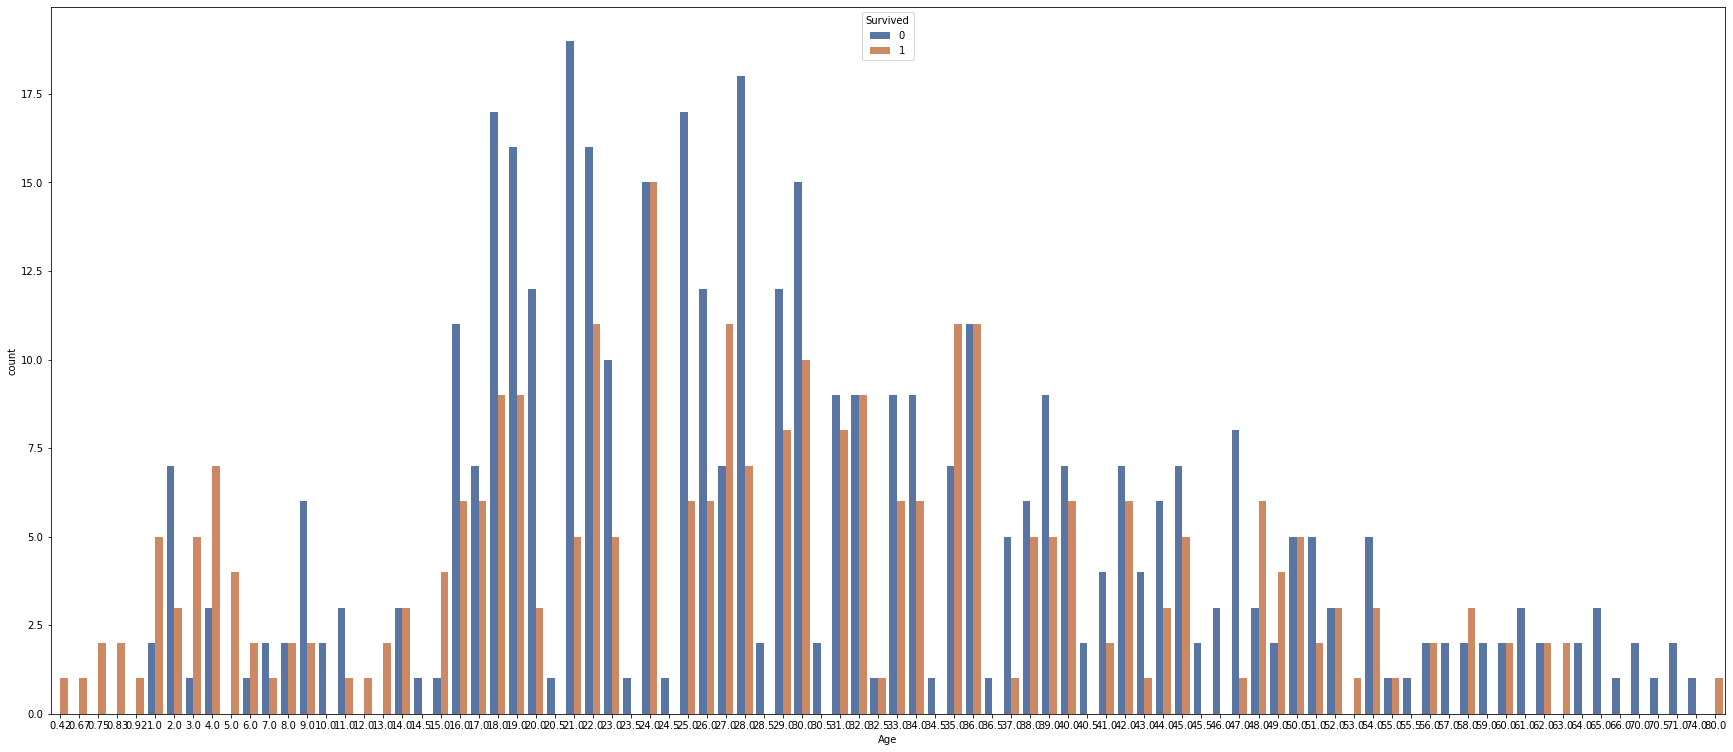

In [8]:
fig = plt.gcf()
fig.set_size_inches(30, 13)
sns.countplot(x="Age", hue="Survived", data=df, palette="deep")

### Port of Embarkation Analysis

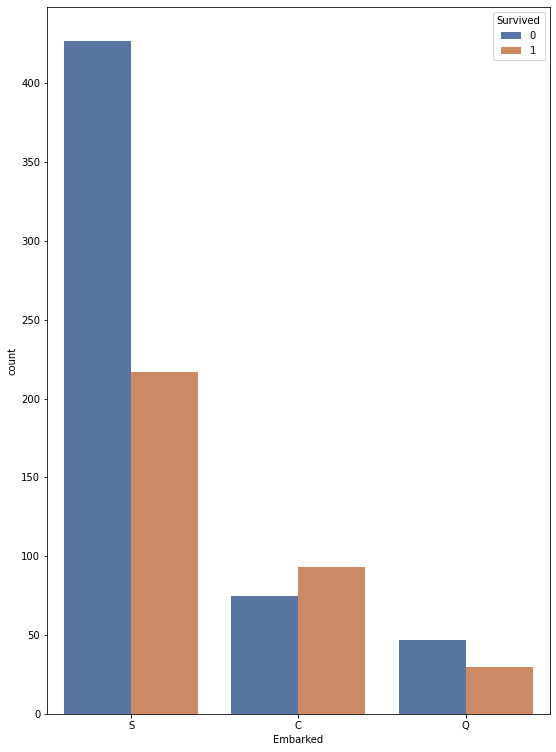

In [9]:
fig = plt.gcf()
fig.set_size_inches(9, 13)
sns.countplot(x="Embarked", hue="Survived", data=df, palette="deep")

# 3. Data Preparation and Cleaning

In [79]:
df.head() # Just to remind us with the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
# Fill the 2 Missing values in Embarked column with 'S' since it's the most common value
values = {'Embarked': 'S', 'Cabin': 'U0'}
df.fillna(value=values, inplace=True)
df['Deck'] = df['Cabin'].str.extract(pat = '([A-Z])') # Extract Passenger Deck from the Cabin column into a new feature
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,U


In [81]:
# Now Let's convert the categorical values in Deck column into numeric
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[['Deck']])
df[['Deck']] = enc.fit_transform(df[['Deck']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,8.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,8.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,8.0


In [82]:
# Again Let's convert the categorical values in Embarked column into numeric
enc = OrdinalEncoder()
enc.fit(df[['Embarked']])
df[['Embarked']] = enc.fit_transform(df[['Embarked']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,2.0,8.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,2.0,8.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2.0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,2.0,8.0


In [83]:
# Apply Ordinal Encoding to Sex column
encoding = {'Sex':{'male': 1, 'female':0}}
df.replace(encoding, inplace=True)

In [84]:
values = {'Age': df['Age'].mean()}
df.fillna(value=values, inplace=True)

In [85]:
df['Fare'] = df['Fare'].astype(int)

In [86]:
# Extract Title from Name Column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')

In [87]:
enc = OrdinalEncoder()
enc.fit(df[['Title']])
df[['Title']] = enc.fit_transform(df[['Title']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7,U0,2.0,8.0,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71,C85,0.0,2.0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7,U0,2.0,8.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53,C123,2.0,2.0,3.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8,U0,2.0,8.0,2.0


In [88]:
bins = [0, 10, 18, 30, 40, 50, 60, 70, 120]
labels = ['0-10', '10-18', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['Agebin'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,Agebin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7,U0,2.0,8.0,2.0,18-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71,C85,0.0,2.0,3.0,30-39
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7,U0,2.0,8.0,1.0,18-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53,C123,2.0,2.0,3.0,30-39
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8,U0,2.0,8.0,2.0,30-39


In [89]:
encoding = {"Agebin": {'0-10': 0, '10-18': 1, '18-29': 2, '30-39': 3, '40-49': 4, '50-59': 5, '60-69': 6, '70+': 7}}

# Apply Ordinal Encoding on preferred_foot column
df.replace(encoding, inplace=True)

In [90]:
# Creating new feature for ranking Age and Passenger Class
df['Age_Class'] = df['Age'] * df['Pclass']
df['Fair_Deck'] = df['Fare'] * df['Deck']
df['Pclass_Deck'] = df['Pclass'] * df['Deck']

In [14]:
columns = ['Survived', 'Pclass', 'Sex','SibSp', 'Parch', 'Fare', 'Embarked', 'Deck']
x_test = df[df['Age'].isnull()]
x_test = x_test[columns]

x_train = df[df['Age'].notnull()]
x = x_train
y_train = x_train['Age'].values
x_train = x_train[columns]

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
pred[pred < 0] = 1 # Replace negative number with 1
pred

array([31.66045169, 30.46236177, 20.79414992, 27.33486571, 25.12677417,
       29.08508434, 31.45197558, 25.12834444, 20.56532756, 27.32671294,
       29.08321023, 27.50806727, 25.12834444, 19.02559024, 38.39770122,
       43.50336376, 15.57432726, 29.08508434, 29.08321023, 25.12788868,
       29.08321023, 29.08321023, 29.08508434, 22.31706542, 20.86222112,
       29.08321023, 31.66906023, 15.71665468, 25.81261956, 29.09217365,
       29.07576602,  1.        , 37.56270632, 45.28356096, 15.84436099,
        1.        , 35.44856217, 44.99095823, 20.96735149, 31.66906023,
       25.12834444,  1.        , 27.60225922, 29.08508434, 16.07313231,
       29.31805845, 23.40897377, 20.96735149, 29.09293327, 36.3369801 ,
       31.66906023, 31.89783155, 45.22188043, 25.12834444, 37.38984826,
       45.28264942, 43.50336376, 38.45847022, 25.12834444, 16.57758722,
       33.28123692, 29.08321023, 35.95190762,  1.        , 16.80635854,
       33.36677611, 29.08508434, 18.37785535, 45.17326523, 27.33

In [16]:
x_test['Age'] = pred.astype(int)
titanic_df = pd.concat([x, x_test])
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1.0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146.0,0,0,1
1,2.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81.0,1,0,0
2,3.0,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146.0,0,0,1
3,4.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55.0,0,0,1
4,5.0,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,NaN,0,3,NaN,1,27.0,0,0,NaN,7.2292,NaN,1,0,0
863,NaN,0,3,NaN,0,1.0,8,2,NaN,69.5500,NaN,0,0,1
868,NaN,0,3,NaN,1,29.0,0,0,NaN,9.5000,NaN,0,0,1
878,NaN,0,3,NaN,1,29.0,0,0,NaN,7.8958,NaN,0,0,1


In [17]:
titanic_df.isnull().sum()

PassengerId    177
Survived         0
Pclass           0
Name           177
Sex              0
Age              0
SibSp            0
Parch            0
Ticket         177
Fare             0
Cabin          177
C                0
Q                0
S                0
dtype: int64

#### We can see now that Age has no missing values

# 4. Creating Model

In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,Agebin,Age_Class,Fair_Deck,Pclass_Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7,U0,2.0,8.0,2.0,2,66.0,56.0,24.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71,C85,0.0,2.0,3.0,3,38.0,142.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7,U0,2.0,8.0,1.0,2,78.0,56.0,24.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53,C123,2.0,2.0,3.0,3,35.0,106.0,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8,U0,2.0,8.0,2.0,3,105.0,64.0,24.0


In [92]:
y_train = df['Survived'].values
X_train = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1)

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model_GB = GradientBoostingClassifier()

parameters = {
        'learning_rate': [0.001, 0.002, 0.01, 0.02, 0.1, 0.2],
        'n_estimators':[100],
        'min_samples_split': [5,10, 20],
        'min_samples_leaf': [5, 10, 20],
        'max_depth': [5, 10, 15, 20]
}

# Using GridSearch for tuning the HyperParameters
grid_GB = GridSearchCV(model_GB, parameters, cv=20)
grid_GB.fit(X_train, y_train)
print('Best Score: ', grid_GB.best_score_, '\nBest Parameters: ', grid_GB.best_params_)

Best Score:  0.8416919191919192 
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 100}


In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

RF = RandomForestClassifier(n_estimators=200)
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

DT = DecisionTreeClassifier()
parameters = {
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [5,10, 15, 20],
        'min_samples_leaf': [5, 10, 15, 20]
}

grid_DT = GridSearchCV(DT, parameters, cv=20)
grid_DT.fit(X_train, y_train)
print('Best Score: ', grid_DT.best_score_, '\nBest Parameters: ', grid_DT.best_params_)

Best Score:  0.8260353535353536 
Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
parameters = {
        'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]
}

grid_knn = GridSearchCV(knn, parameters, cv=20)
grid_knn.fit(X_train, y_train)
print('Best Score: ', grid_knn.best_score_, '\nBest Parameters: ', grid_knn.best_params_)

Best Score:  0.7131818181818183 
Best Parameters:  {'n_neighbors': 9}


# 5. Work on the Test Data

In [132]:
test_df = pd.read_csv('../input/titanic/test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [133]:
values = {'Embarked': 'S', 'Cabin': 'U0'}
test_df.fillna(value=values, inplace=True)
test_df['Deck'] = test_df['Cabin'].str.extract(pat = '([A-Z])') # Extract Passenger Deck from the Cabin column into a new feature
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U0,Q,U
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U0,S,U
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U0,Q,U
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U0,S,U
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U0,S,U


In [134]:
enc = OrdinalEncoder()
enc.fit(test_df[['Deck']])
test_df[['Deck']] = enc.fit_transform(test_df[['Deck']])
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U0,Q,7.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U0,S,7.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U0,Q,7.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U0,S,7.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U0,S,7.0


In [135]:
enc = OrdinalEncoder()
enc.fit(test_df[['Embarked']])
test_df[['Embarked']] = enc.fit_transform(test_df[['Embarked']])
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U0,1.0,7.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U0,2.0,7.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U0,1.0,7.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U0,2.0,7.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U0,2.0,7.0


In [136]:
encoding = {'Sex':{'male': 1, 'female':0}}
test_df.replace(encoding, inplace=True)
values = {'Age': test_df['Age'].mean()}
test_df.fillna(value=values, inplace=True)
test_df['Fare'] = test_df['Fare'].fillna(0)
test_df['Fare'] = test_df['Fare'].astype(int)

In [137]:
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')
test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')

enc = OrdinalEncoder()
enc.fit(test_df[['Title']])
test_df[['Title']] = enc.fit_transform(test_df[['Title']])
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7,U0,1.0,7.0,2.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7,U0,2.0,7.0,3.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9,U0,1.0,7.0,2.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8,U0,2.0,7.0,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12,U0,2.0,7.0,3.0


In [138]:
bins = [0, 10, 18, 30, 40, 50, 60, 70, 120]
labels = ['0-10', '10-18', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']
test_df['Agebin'] = pd.cut(test_df.Age, bins, labels = labels,include_lowest = True)

encoding = {"Agebin": {'0-10': 0, '10-18': 1, '18-29': 2, '30-39': 3, '40-49': 4, '50-59': 5, '60-69': 6, '70+': 7}}

# Apply Ordinal Encoding on preferred_foot column
test_df.replace(encoding, inplace=True)

In [139]:
# Creating new feature for ranking Age and Passenger Class
test_df['Age_Class'] = test_df['Age'] * test_df['Pclass']
test_df['Fair_Deck'] = test_df['Fare'] * test_df['Deck']
test_df['Pclass_Deck'] = test_df['Pclass'] * test_df['Deck']

In [140]:
dff = test_df.copy()
X_test = test_df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1)

In [ ]:
OHE = pd.get_dummies(test_df.Embarked)
test_df = pd.concat([test_df,OHE], axis=1)
del test_df['Embarked']

# Apply Ordinal Encoding to Sex column
encoding = {'Sex':{'male': 1, 'female':0}}
test_df.replace(encoding, inplace=True)

dff = test_df.copy()
test_df

In [ ]:
columns = ['Pclass', 'Sex','SibSp', 'Parch', 'Fare', 'Cabin', 'S', 'C', 'Q']
x_test = test_df[test_df['Age'].isnull()]
x_test = x_test[columns]

x_train = test_df[test_df['Age'].notnull()]
x = x_train
y_train = x_train['Age'].values
x_train = x_train[columns]
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
pred[pred < 0] = 1 # Replace negative number with 1
pred

In [ ]:
x_test['Age'] = pred.astype(int)
final_df = pd.concat([x, x_test])
final_df

In [111]:
# Using Gradient Boosting Classifier
pred = grid_GB.predict(X_test)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [128]:
# Using Random Forest Classifier
pred = RF.predict(X_test)
pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [141]:
# Using Decision Tree Classifier
pred = grid_DT.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [110]:
# Using Random Forest Classifier
pred = grid_knn.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [142]:
dff['Survived'] = pred.astype(int)
dff.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,Agebin,Age_Class,Fair_Deck,Pclass_Deck,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7,U0,1.0,7.0,2.0,3,103.5,49.0,21.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7,U0,2.0,7.0,3.0,4,141.0,49.0,21.0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9,U0,1.0,7.0,2.0,6,124.0,63.0,14.0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8,U0,2.0,7.0,2.0,2,81.0,56.0,21.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12,U0,2.0,7.0,3.0,2,66.0,84.0,21.0,0


In [143]:
final_df = dff[['PassengerId', 'Survived']]
final_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [145]:
final_df.to_csv('sixth_submission.csv',index=False)